In [1]:
import pandas as pd
%matplotlib inline

In [2]:
from pathlib import Path
csvpath = Path('../data/cleandata/Data.csv')
df1 = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df = df1[:-5]
df.tail()

,Crude1,WTI_Midland,Brent,RBOB,Ethanol,Corn,CAD_Heavy,VIX,ULSD,OPEC_Basket,RBOB_Crack,GC_ULSD_Crack,NY_ULSD_Crack,NG_HB,S_P,VLO
Date,,,,,,,,,,,,,,,,
2019-06-17,51.93,-0.57,60.94,1.6908,1.603,454.75,-12.876,15.275,1.7995,61.60,19.28,21.38,23.32,2.386,2891.9,76.086365
2019-06-18,53.90,-0.49,62.14,1.7214,1.600,449.75,-12.876,15.075,1.8278,61.43,18.98,21.01,22.97,2.328,2921.7,76.946831
2019-06-19,53.76,-0.52,61.82,1.7355,1.563,441.00,-13.750,15.875,1.8294,62.21,19.27,21.12,23.06,2.276,2929.1,77.302879
2019-06-20,56.65,-0.54,64.45,1.7863,1.592,450.00,-13.650,16.125,1.8843,63.95,18.94,20.83,22.79,2.185,2955.7,78.875443
2019-06-21,57.43,-0.53,65.20,1.8561,1.575,442.25,-13.650,16.525,1.9158,65.29,19.72,21.09,23.08,2.186,2950.6,81.011757


# ARIMA Model

In [3]:
from statsmodels.tsa.arima_model import ARIMA

In [4]:
# Create an ARIMA model
model = ARIMA(df.VLO.values, order=(2, 1, 1))

In [5]:
# Fit the model to the data
results = model.fit()

In [6]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  599
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1037.720
Method:                       css-mle   S.D. of innovations              1.368
Date:                Sat, 16 Nov 2019   AIC                           2085.439
Time:                        11:03:58   BIC                           2107.416
Sample:                             1   HQIC                          2093.995
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0353      0.075      0.474      0.636      -0.111       0.182
ar.L1.D.y      0.6800      0.181      3.751      0.000       0.325       1.035
ar.L2.D.y      0.0760      0.046      1.644      0.101      -0.015       0.167
ma.L1.D.y     -0.6736      0.179     -3.767      0.000      -1.024      -0.323
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2859           +0.0000j            1.2859            0.0000
AR.2          -10.2367           +0.0000j           10.2367            0.5000
MA.1            1.4846           +0.0000j            1.4846            0.0000
-----------------------------------------------------------------------------
"""

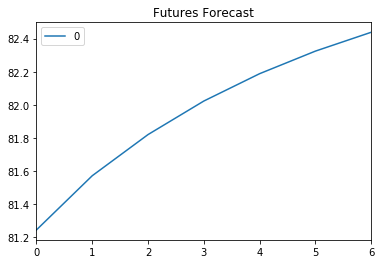

In [7]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=7)[0]).plot(title="Futures Forecast")

In [8]:
df1.tail()

,Crude1,WTI_Midland,Brent,RBOB,Ethanol,Corn,CAD_Heavy,VIX,ULSD,OPEC_Basket,RBOB_Crack,GC_ULSD_Crack,NY_ULSD_Crack,NG_HB,S_P,VLO
Date,,,,,,,,,,,,,,,,
2019-06-24,57.90,-0.53,64.86,1.8549,1.575,446.75,-13.20,16.275,1.9089,65.05,19.59,20.94,22.89,2.303,2952.1,79.874367
2019-06-25,57.83,-0.55,65.05,1.8772,1.580,447.50,-12.95,16.675,1.9234,64.79,19.79,21.11,23.02,2.308,2922.1,80.734825
2019-06-26,59.38,-0.63,66.49,1.9704,1.567,443.25,-13.00,16.525,1.9713,65.60,20.14,21.17,23.09,2.291,2917.9,83.998634
2019-06-27,59.43,-0.60,66.55,1.9466,1.561,440.00,-13.00,16.075,1.9525,65.61,20.04,21.10,23.01,2.324,2930.9,83.009605
2019-06-28,58.47,-0.57,64.74,1.9425,1.505,420.25,-13.30,15.525,1.9446,65.60,20.08,21.14,23.04,2.308,2944.2,84.671181
